# ELECTRIC VEHICLE DATA ANALYSIS

## STEP 1: Importing Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 2: Reading the Data

In [23]:
data = pd.read_csv("/kaggle/input/electric-vehicle-data-1997-2024-update-version/us_car_data.csv")

## STEP 3: Data Exploring

In [24]:
data.head(5)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134474 entries, 0 to 134473
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   County                 134474 non-null  object 
 1   City                   134474 non-null  object 
 2   State                  134474 non-null  object 
 3   Postal Code            134474 non-null  int64  
 4   Model Year             134474 non-null  int64  
 5   Make                   134474 non-null  object 
 6   Model                  134474 non-null  object 
 7   Electric Vehicle Type  134474 non-null  object 
 8   CAFV                   134474 non-null  object 
 9   Electric Range         134474 non-null  int64  
 10  Base MSRP              134474 non-null  int64  
 11  Legislative District   134474 non-null  int64  
 12  DOL Vehicle ID         134474 non-null  int64  
 13  Electric Utility       134474 non-null  object 
 14  2020 Census Tract      134474 non-nu

In [26]:
data.shape

(134474, 17)

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,134474.0,9.825923e+04,3.030690e+02,9.800100e+04,9.805200e+04,9.812200e+04,9.837000e+04,9.940300e+04
Model Year,134474.0,2.019657e+03,3.001443e+00,1.997000e+03,2.018000e+03,2.021000e+03,2.022000e+03,2.024000e+03
Electric Range,134474.0,7.473021e+01,9.877604e+01,0.000000e+00,0.000000e+00,2.100000e+01,1.500000e+02,3.370000e+02
Base MSRP,134474.0,1.451396e+03,9.691901e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,134474.0,2.949991e+01,1.478629e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,134474.0,2.063218e+08,8.590842e+07,4.385000e+03,1.601798e+08,2.059191e+08,2.308773e+08,4.792548e+08
2020 Census Tract,134474.0,5.303964e+10,1.617660e+07,5.300195e+10,5.303301e+10,5.303303e+10,5.305307e+10,5.307794e+10
Longitude,134474.0,-1.220927e+02,1.006671e+00,-1.246251e+02,-1.224056e+02,-1.222964e+02,-1.221517e+02,-1.170444e+02
latitude,134474.0,4.746771e+01,6.152750e-01,4.558386e+01,4.735798e+01,4.761385e+01,4.771558e+01,4.899634e+01


In [28]:
data.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'CAFV', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Electric Utility',
       '2020 Census Tract', 'Longitude', 'latitude'],
      dtype='object')

## STEP 4: Data Cleaning

In [29]:
data.isnull().sum()

County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Electric Utility         0
2020 Census Tract        0
Longitude                0
latitude                 0
dtype: int64

In [30]:
# Calculate the number of null values for each column
null_counts = data.isnull().sum()

# Calculate the percentage of null values for each column
null_percentage = ((null_counts / len(data))*100)

# Create a DataFrame to display the results
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

# Display the summary
print(null_summary)

                       Null Count  Null Percentage
County                          0              0.0
City                            0              0.0
State                           0              0.0
Postal Code                     0              0.0
Model Year                      0              0.0
Make                            0              0.0
Model                           0              0.0
Electric Vehicle Type           0              0.0
CAFV                            0              0.0
Electric Range                  0              0.0
Base MSRP                       0              0.0
Legislative District            0              0.0
DOL Vehicle ID                  0              0.0
Electric Utility                0              0.0
2020 Census Tract               0              0.0
Longitude                       0              0.0
latitude                        0              0.0


In [84]:
# Find duplicate rows
duplicates = data[data.duplicated()].sum()

print(duplicates)

County                     0
City                       0
State                      0
Postal Code                0
Model Year                 0
Make                       0
Model                      0
Electric Vehicle Type      0
CAFV                       0
Electric Range             0
Base MSRP                  0
Legislative District       0
DOL Vehicle ID             0
Electric Utility           0
2020 Census Tract          0
Longitude                0.0
latitude                 0.0
dtype: object


> Checking for outlier 

## STEP 5: Data Analysis

In [31]:
count_by_county = data["County"].value_counts()
count_by_county.to_csv("count_by_county.csv")

In [32]:
count_by_county.head(10)

County
King         70682
Snohomish    15226
Pierce       10394
Clark         7983
Thurston      4844
Kitsap        4452
Spokane       3326
Whatcom       3313
Benton        1687
Skagit        1500
Name: count, dtype: int64

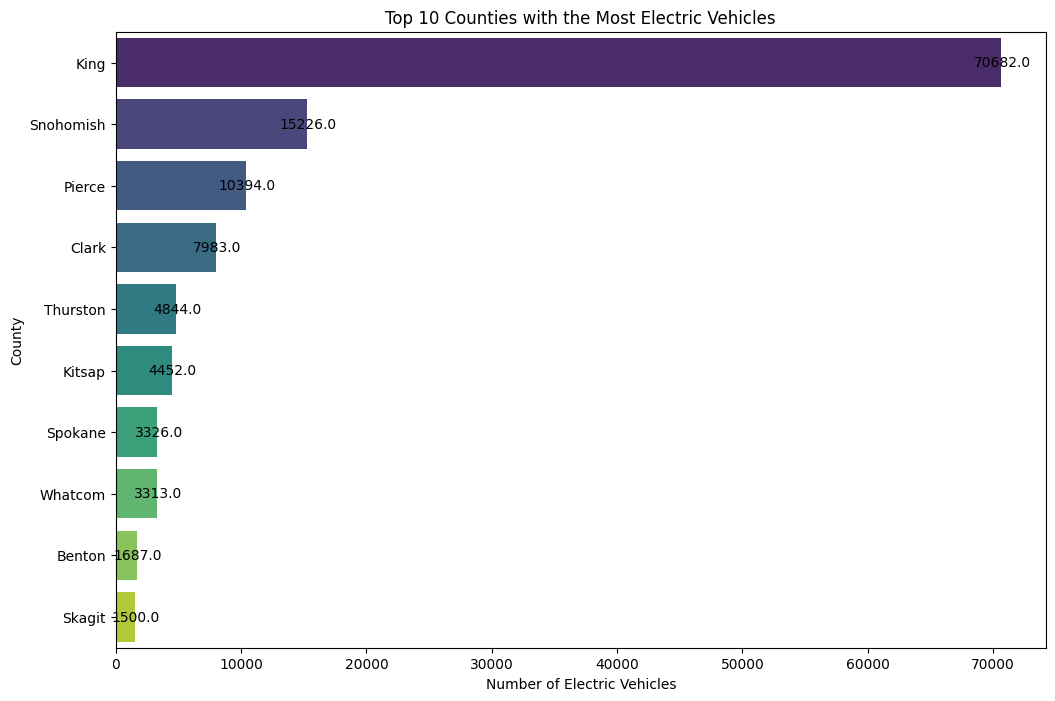

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Calculate the number of vehicles per county
county_counts = data['County'].value_counts()

# Get the top 10 counties
top_10_counties = county_counts.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_counties.values, y=top_10_counties.index, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)
plt.title('Top 10 Counties with the Most Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()


In [37]:
count_by_city = data["City"].value_counts()
count_by_city.to_csv("count_by_city.csv")

In [38]:
count_by_city.head(10)

City
Seattle      23408
Bellevue      6944
Redmond       4958
Vancouver     4815
Kirkland      4196
Bothell       4191
Sammamish     3945
Renton        3511
Olympia       3224
Tacoma        2842
Name: count, dtype: int64

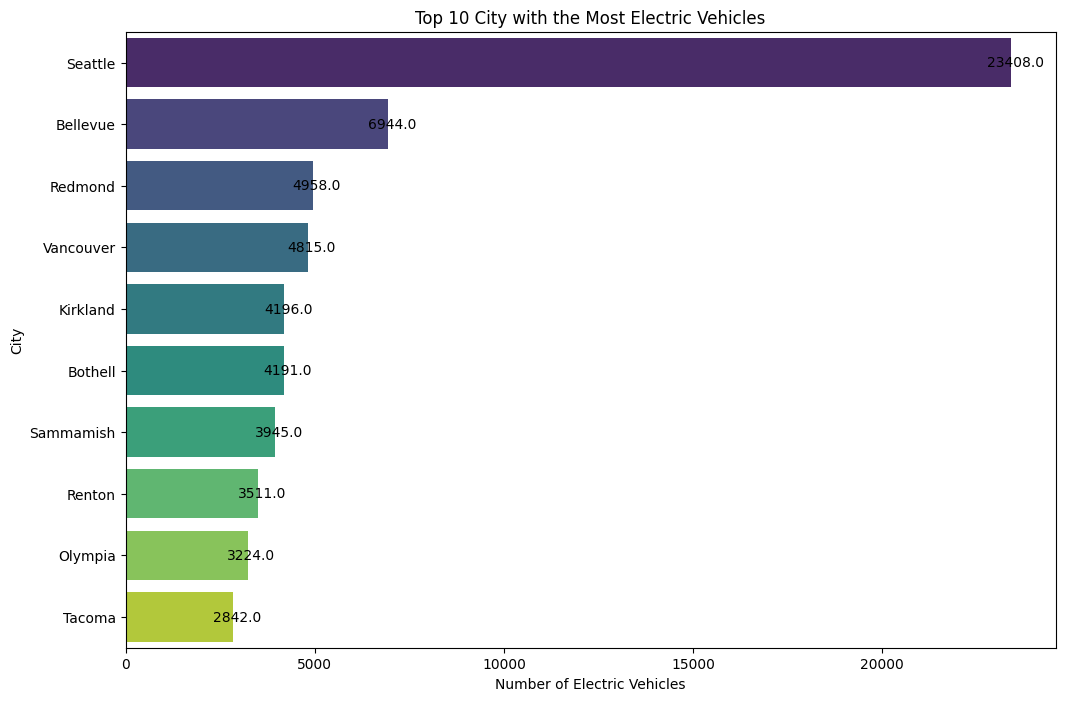

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Calculate the number of vehicles per county
city_counts = data['City'].value_counts()

# Get the top 10 counties
top_10_cities = city_counts.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_cities.values, y=top_10_cities.index,palette='viridis')


for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)
plt.title('Top 10 City with the Most Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()

In [41]:
count_by_state = data["State"].value_counts()
count_by_state.to_csv("count_by_state.csv")

In [42]:
count_by_state .head(10)

State
WA    134474
Name: count, dtype: int64

In [54]:
count_by_ModelYear = data["Model Year"].value_counts()
count_by_ModelYear.to_csv("count_by_ModelYear.csv")

In [55]:
count_by_ModelYear.head(10)

Model Year
2022    27919
2023    22209
2021    18478
2018    14314
2020    11119
2019    10555
2017     8557
2016     5676
2015     4910
2013     4589
Name: count, dtype: int64

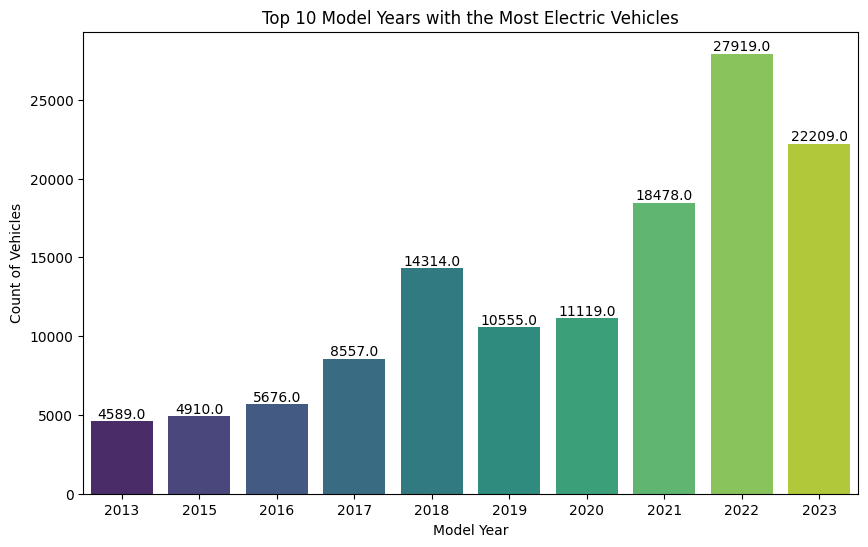

In [57]:
# Calculate the number of vehicles per model year
count_by_ModelYear = data['Model Year'].value_counts().sort_index()

# Sort the counts in descending order and select the top 10
top_10_model_years = count_by_ModelYear.sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn with the 'viridis' color palette
sns.barplot(x=top_10_model_years.index, y=top_10_model_years.values,palette=sns.color_palette('viridis', len(top_10_model_years)))

# Add data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom',
                color='black', fontsize=10)

# Set labels and title
plt.xlabel("Model Year")
plt.ylabel("Count of Vehicles")
plt.title("Top 10 Model Years with the Most Electric Vehicles")

# Show plot
plt.show()

In [58]:
count_by_Model = data["Model"].value_counts()
count_by_Model.to_csv("count_by_Model.csv")

In [59]:
count_by_Model.head(10)

Model
MODEL 3        25752
MODEL Y        23531
LEAF           13008
MODEL S         7455
BOLT EV         5414
VOLT            4868
MODEL X         4866
NIRO            2603
ID.4            2473
PRIUS PRIME     2464
Name: count, dtype: int64

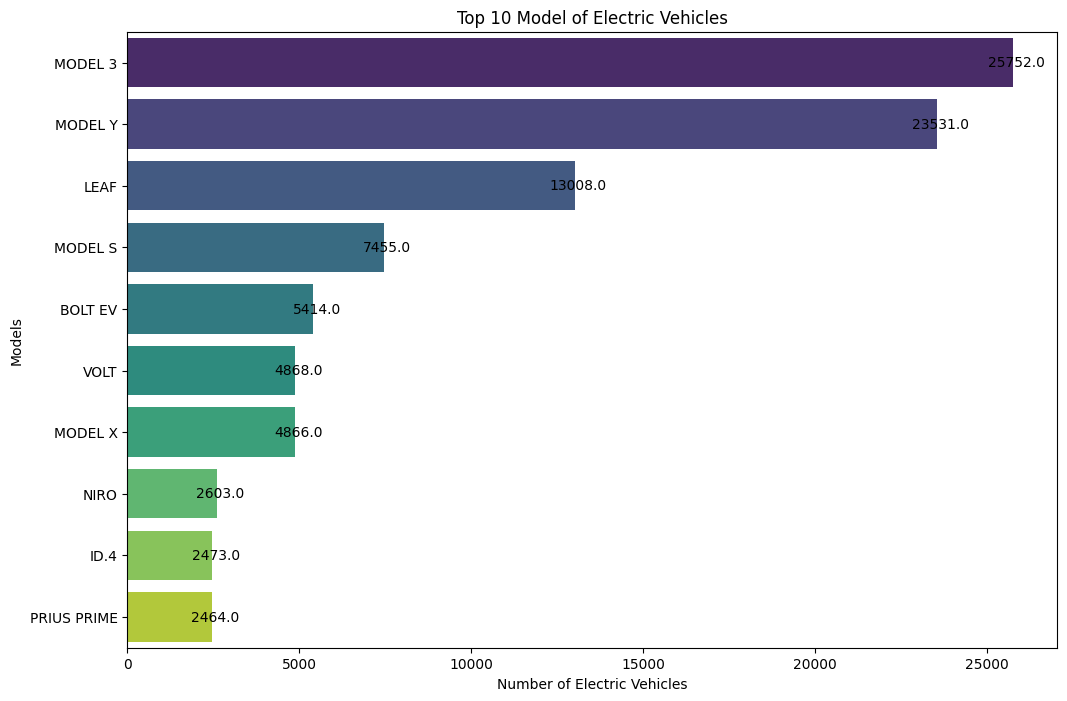

In [61]:
# Get the top 10 counties
top_10_models = count_by_Model.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_models.values, y=top_10_models.index,palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

plt.title('Top 10 Model of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Models')
plt.show()

In [65]:
count_by_Make = data["Make"].value_counts()
count_by_Make.to_csv("count_by_Make.csv")

In [66]:
count_by_Make.head(10)

Make
TESLA         61650
NISSAN        13138
CHEVROLET     11417
FORD           6876
BMW            5881
KIA            5484
TOYOTA         4857
VOLKSWAGEN     3518
VOLVO          2965
AUDI           2720
Name: count, dtype: int64

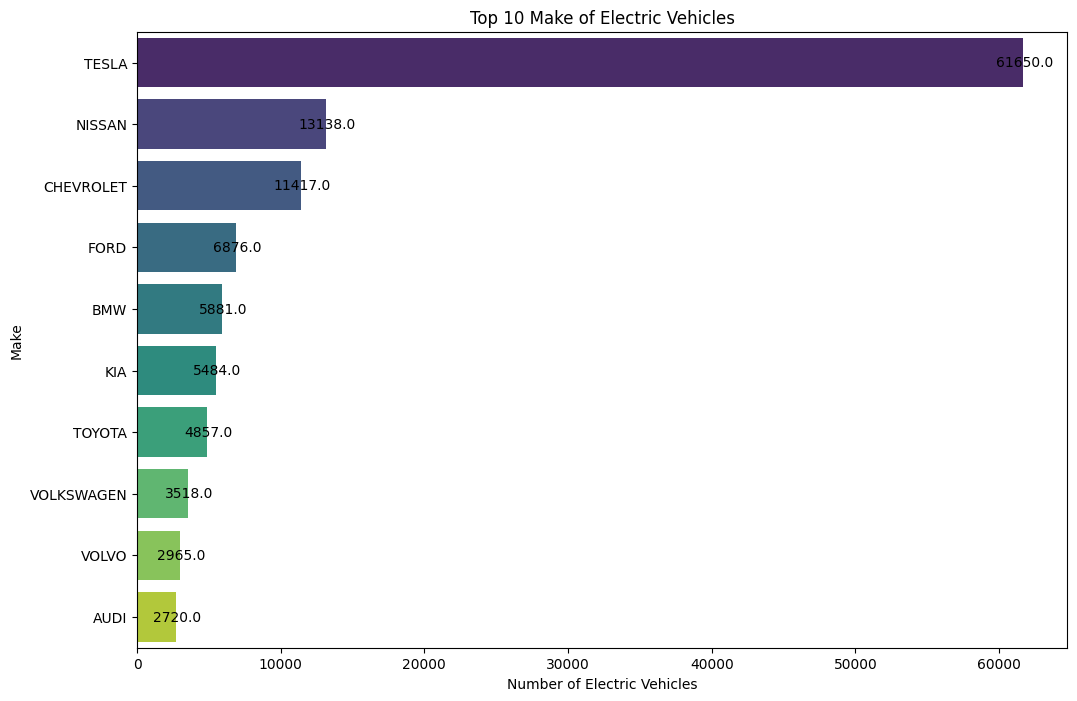

In [69]:
# Get the top 10 counties
top_10_make = count_by_Make.head(10)

# Plotting the top 10 counties
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_10_make.values, y=top_10_make.index,palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black', fontsize=10)

plt.title('Top 10 Make of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Make')
plt.show()

In [70]:
count_by_Vehicle_Type  = data["Electric Vehicle Type"].value_counts()
count_by_Vehicle_Type .to_csv("count_by_Vehicle_Type .csv")

In [71]:
count_by_Vehicle_Type

Electric Vehicle Type
Battery Electric Vehicle              103424
Plug-in Hybrid Electric Vehicle        31050
Name: count, dtype: int64

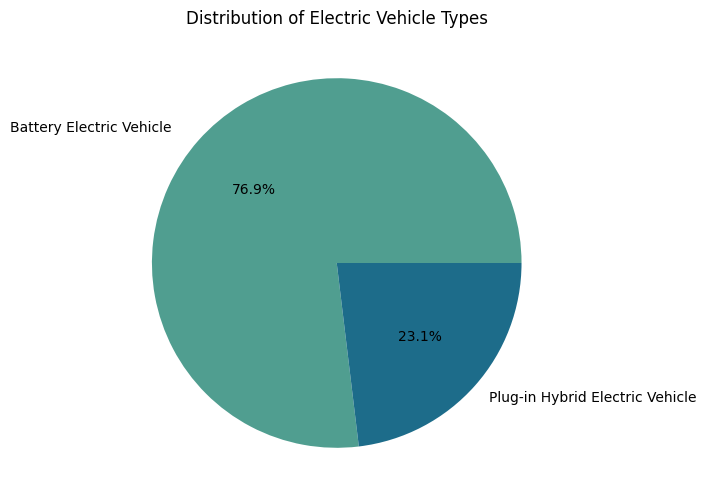

In [72]:
# Calculate the number of vehicles by type
count_by_Vehicle_Type = data['Electric Vehicle Type'].value_counts()

# Save the data to a CSV file
count_by_Vehicle_Type.to_csv("count_by_Vehicle_Type.csv", header=True)

# Plotting the pie chart
plt.figure(figsize=(8, 6))

# Create a color palette with enough colors for the pie chart
colors = sns.color_palette('crest', len(count_by_Vehicle_Type))

# Create a pie chart
plt.pie(count_by_Vehicle_Type, labels=count_by_Vehicle_Type.index, autopct='%1.1f%%', colors=colors)

# Set title
plt.title("Distribution of Electric Vehicle Types")

# Show the plot
plt.show()

In [73]:
count_by_Electric_Range = data["Electric Range"].value_counts()
count_by_Electric_Range.to_csv("count_by_Electric_Range.csv")

In [75]:
count_by_Electric_Range.head(10)

Electric Range
0      56618
215     6422
220     4150
84      4036
238     3508
25      3231
19      2534
208     2499
53      2487
291     2367
Name: count, dtype: int64